In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Libraries imported.


In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0



body = client_180ddbb97eb744dea01b3468733dd0b6.get_object(Bucket='capstone-datacatalog-syejlfgbv',Key='data_asset/NYPD_Arrest_Data__Year_to_Date_M_HJaTxzeBV.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)

df_data_2 .drop(['PD_CD','KY_CD','LAW_CODE','LAW_CAT_CD','JURISDICTION_CODE','ARREST_PRECINCT'], axis=1, inplace=True)

df_data_2.head() 




,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,184611183,06/30/2018 12:00:00 AM,"BURGLARY,UNCLASSIFIED,UNKNOWN TIME",BURGLARY,M,25-44,M,WHITE HISPANIC,983190,208988,40.740309,-74.003827
1,184619323,06/30/2018 12:00:00 AM,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,M,45-64,F,BLACK,987633,203880,40.726288,-73.987796
2,184621759,06/30/2018 12:00:00 AM,"TRAFFIC,UNCLASSIFIED MISDEMEAN",VEHICLE AND TRAFFIC LAWS,M,25-44,M,BLACK,1002892,232227,40.804074,-73.932665
3,184626775,06/30/2018 12:00:00 AM,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",PETIT LARCENY,M,25-44,M,WHITE HISPANIC,993312,228266,40.793217,-73.967274
4,184616966,06/30/2018 12:00:00 AM,"ROBBERY,UNCLASSIFIED,OPEN AREAS",ROBBERY,M,25-44,M,BLACK HISPANIC,993373,229301,40.796058,-73.967052


In [3]:
print ('data dimensions:', df_data_2.shape)

data dimensions: (34033, 12)


In [4]:
df_a=df_data_2['AGE_GROUP'].value_counts().to_frame()
df_a

,AGE_GROUP
25-44,17537
45-64,7760
18-24,6895
<18,1415
65+,426


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# autopct create %, start angle represent starting point
df_a['AGE_GROUP'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     
                            shadow=True, 
                            labels=None# add shadow      
                            )

plt.title('Age group of the arrested individuals')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_a.index, loc='upper left') 

plt.show()



In [6]:

df_b=df_data_2['PERP_RACE'].value_counts().to_frame()
df_b

,PERP_RACE
BLACK,15769
WHITE HISPANIC,8464
WHITE,4749
BLACK HISPANIC,3314
ASIAN / PACIFIC ISLANDER,1358
UNKNOWN,286
AMERICAN INDIAN/ALASKAN NATIVE,93


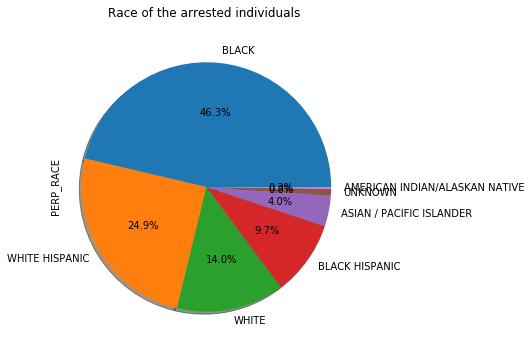

In [7]:
# autopct create %, start angle represent starting point
df_b['PERP_RACE'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=0,     
                            shadow=True,
                            )

plt.title('Race of the arrested individuals')
plt.axis('equal') # Sets the pie chart to look like a circle.


plt.show()

In [8]:
df_d=df_data_2['PERP_SEX'].value_counts().to_frame()

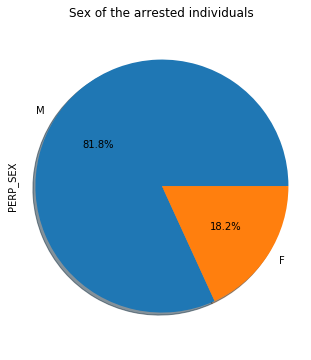

In [9]:
# autopct create %, start angle represent starting point
df_d['PERP_SEX'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=0,     
                            shadow=True,
                            )

plt.title('Sex of the arrested individuals')
plt.axis('equal') # Sets the pie chart to look like a circle.


plt.show()

In [10]:
df_c=df_data_2['OFNS_DESC'].value_counts().to_frame()
df_c[:10]

,OFNS_DESC
PETIT LARCENY,4828
DANGEROUS DRUGS,4590
ASSAULT 3 & RELATED OFFENSES,3278
VEHICLE AND TRAFFIC LAWS,2878
GRAND LARCENY,2390
OTHER OFFENSES RELATED TO THEF,1663
FELONY ASSAULT,1441
CRIMINAL MISCHIEF & RELATED OF,1272
DANGEROUS WEAPONS,1030
MISCELLANEOUS PENAL LAW,996


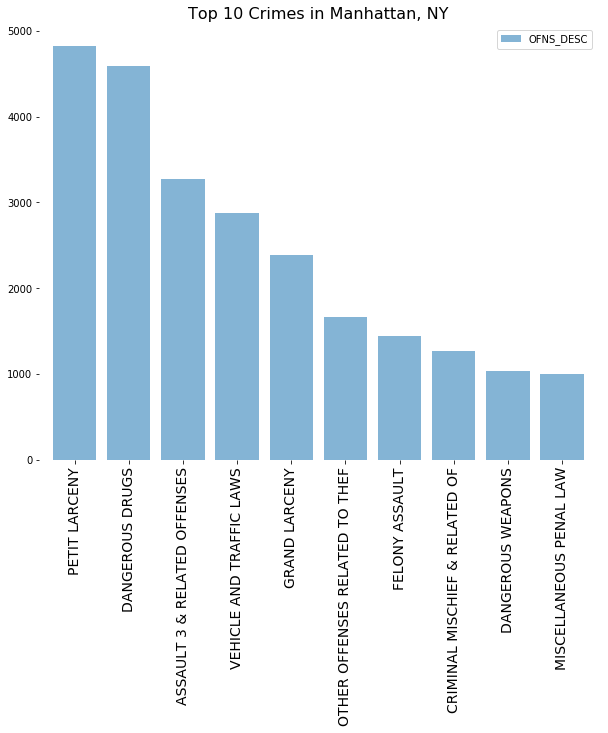

In [11]:
# bar chart for the top 10 crimes
ax = df_c[:10].plot(kind='bar', alpha=0.55, stacked=False, figsize=(10, 8), width = 0.8,edgecolor=None)
plt.title("Top 10 Crimes in Manhattan, NY",fontsize= 16)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)


In [12]:
#Now use the geogrpahical data to map the incidents. 

In [13]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [14]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [15]:
neighborhoods_data = newyork_data['features']

In [16]:
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [17]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [18]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [19]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [20]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [21]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [22]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [23]:
## Manhattan Crime data 


In [24]:
df_data_2.shape

(34033, 12)

In [25]:
df_data_2.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,184611183,06/30/2018 12:00:00 AM,"BURGLARY,UNCLASSIFIED,UNKNOWN TIME",BURGLARY,M,25-44,M,WHITE HISPANIC,983190,208988,40.740309,-74.003827
1,184619323,06/30/2018 12:00:00 AM,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,M,45-64,F,BLACK,987633,203880,40.726288,-73.987796
2,184621759,06/30/2018 12:00:00 AM,"TRAFFIC,UNCLASSIFIED MISDEMEAN",VEHICLE AND TRAFFIC LAWS,M,25-44,M,BLACK,1002892,232227,40.804074,-73.932665
3,184626775,06/30/2018 12:00:00 AM,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",PETIT LARCENY,M,25-44,M,WHITE HISPANIC,993312,228266,40.793217,-73.967274
4,184616966,06/30/2018 12:00:00 AM,"ROBBERY,UNCLASSIFIED,OPEN AREAS",ROBBERY,M,25-44,M,BLACK HISPANIC,993373,229301,40.796058,-73.967052


In [26]:
#Get the location details for Manhattan
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


In [27]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Folium installed and imported!


In [28]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=13)

In [29]:
map_manhattan

In [30]:
df_data_2.sample(1000) ## Sample 1000 random crime incidents
df_data_2
#limit = 1000
#df_data_2 = df_data_2.iloc[0:limit, :]
df_data_2



,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,184611183,06/30/2018 12:00:00 AM,"BURGLARY,UNCLASSIFIED,UNKNOWN TIME",BURGLARY,M,25-44,M,WHITE HISPANIC,983190,208988,40.740309,-74.003827
1,184619323,06/30/2018 12:00:00 AM,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,M,45-64,F,BLACK,987633,203880,40.726288,-73.987796
2,184621759,06/30/2018 12:00:00 AM,"TRAFFIC,UNCLASSIFIED MISDEMEAN",VEHICLE AND TRAFFIC LAWS,M,25-44,M,BLACK,1002892,232227,40.804074,-73.932665
3,184626775,06/30/2018 12:00:00 AM,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",PETIT LARCENY,M,25-44,M,WHITE HISPANIC,993312,228266,40.793217,-73.967274
4,184616966,06/30/2018 12:00:00 AM,"ROBBERY,UNCLASSIFIED,OPEN AREAS",ROBBERY,M,25-44,M,BLACK HISPANIC,993373,229301,40.796058,-73.967052
5,184622912,06/30/2018 12:00:00 AM,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",PETIT LARCENY,M,45-64,M,BLACK,991040,225092,40.784507,-73.975483
6,184609020,06/30/2018 12:00:00 AM,"CONTROLLED SUBSTANCE, POSSESSION 7",DANGEROUS DRUGS,M,25-44,F,BLACK,990875,210970,40.745746,-73.976092
7,184609627,06/30/2018 12:00:00 AM,"TRAFFIC,UNCLASSIFIED MISDEMEAN",VEHICLE AND TRAFFIC LAWS,M,25-44,M,BLACK,980772,194845,40.701489,-74.012545
8,184631336,06/30/2018 12:00:00 AM,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,M,45-64,M,BLACK,984278,205026,40.729434,-73.999900
9,184627753,06/30/2018 12:00:00 AM,"ROBBERY,UNCLASSIFIED,OPEN AREAS",ROBBERY,M,25-44,M,BLACK,997834,235324,40.812584,-73.950929


In [31]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_data_2.Latitude, df_data_2.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
map_manhattan.add_child(incidents)

In [32]:
CLIENT_ID = '0FNUJY2SLQGHJ22TBKIQSQHY0KJOJ2GNZ1ZTDJC3PAU0LLFL' # your Foursquare ID
CLIENT_SECRET = '134APLWJHIXZTSOFCMNUQCRK1LBZC055ED34FQBA5PPOUG0R' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0FNUJY2SLQGHJ22TBKIQSQHY0KJOJ2GNZ1ZTDJC3PAU0LLFL
CLIENT_SECRET:134APLWJHIXZTSOFCMNUQCRK1LBZC055ED34FQBA5PPOUG0R


In [33]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [34]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [35]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=0FNUJY2SLQGHJ22TBKIQSQHY0KJOJ2GNZ1ZTDJC3PAU0LLFL&client_secret=134APLWJHIXZTSOFCMNUQCRK1LBZC055ED34FQBA5PPOUG0R&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [38]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3307, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Land & Sea Restaurant,40.877885,-73.905873,Seafood Restaurant


In [39]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,100,100,100,100,100,100
Carnegie Hill,100,100,100,100,100,100
Central Harlem,44,44,44,44,44,44
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,44,44,44,44,44,44
East Village,100,100,100,100,100,100


In [40]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 331 uniques categories.


In [41]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack P

In [42]:
manhattan_onehot.shape

(3307, 332)

In [43]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack P

In [44]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                venue  freq
0         Coffee Shop  0.08
1                Park  0.07
2               Hotel  0.05
3           Wine Shop  0.03
4  Italian Restaurant  0.03


----Carnegie Hill----
                 venue  freq
0          Pizza Place  0.06
1       Cosmetics Shop  0.05
2          Coffee Shop  0.05
3                 Café  0.04
4  Japanese Restaurant  0.03


----Central Harlem----
                  venue  freq
0    African Restaurant  0.07
1    Seafood Restaurant  0.05
2   American Restaurant  0.05
3    Chinese Restaurant  0.05
4  Gym / Fitness Center  0.05


----Chelsea----
                 venue  freq
0          Coffee Shop  0.07
1   Italian Restaurant  0.06
2       Ice Cream Shop  0.05
3               Bakery  0.04
4  American Restaurant  0.04


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.09
1        Bubble Tea Shop  0.06
2     Dim Sum Restaurant  0.04
3  Vietnamese Restaurant  0.04
4           Cocktail Bar  0.04


---

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Coffee Shop,Park,Hotel,Wine Shop,Italian Restaurant,Ice Cream Shop,Fountain,Shopping Mall,Pizza Place,Food Truck
1,Carnegie Hill,Pizza Place,Coffee Shop,Cosmetics Shop,Café,Yoga Studio,Spa,Bar,Bookstore,French Restaurant,Gym
2,Central Harlem,African Restaurant,Chinese Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Seafood Restaurant,Gym / Fitness Center,Cycle Studio,Dessert Shop,Public Art
3,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,American Restaurant,Nightclub,Theater,Hotel,Seafood Restaurant,Bookstore
4,Chinatown,Chinese Restaurant,Bubble Tea Shop,American Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Cocktail Bar,Hotpot Restaurant,Noodle House,Salon / Barbershop,Bakery


In [47]:
manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

from sklearn.cluster import KMeans
for k in range (1, 11):
 
# Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.


    kmeans = KMeans(n_clusters=k, random_state=1).fit(manhattan_grouped_clustering)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans.labels_
 
# Sum of distances of samples to their closest cluster center
    interia = kmeans.inertia_
    print ("k:",k, " cost:", interia)

k: 1  cost: 0.815330638228
k: 2  cost: 0.721474258678
k: 3  cost: 0.705559164895
k: 4  cost: 0.620708930125
k: 5  cost: 0.579898541799
k: 6  cost: 0.548597967316
k: 7  cost: 0.540714789606
k: 8  cost: 0.487110189216
k: 9  cost: 0.461556915032
k: 10  cost: 0.434430410405


In [48]:

#At some point, the cost will not decrease much between values.
#Then this is a good place to choose k.== 5 will be a good point

In [49]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 0, 2, 0, 2, 2, 3, 0, 2], dtype=int32)

In [50]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Kids Store,Steakhouse,Supplement Shop,Shopping Mall,Shoe Store,Seafood Restaurant,Tennis Stadium
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bubble Tea Shop,American Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Cocktail Bar,Hotpot Restaurant,Noodle House,Salon / Barbershop,Bakery
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Mobile Phone Shop,Tapas Restaurant,Caribbean Restaurant,Sandwich Place,Chinese Restaurant,Supermarket,Grocery Store,Gym
3,Manhattan,Inwood,40.867684,-73.921210,3,Lounge,Café,Mexican Restaurant,Pizza Place,Wine Bar,Park,Bakery,Frozen Yogurt Shop,Deli / Bodega,Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Mexican Restaurant,Coffee Shop,Café,Pizza Place,Deli / Bodega,Cocktail Bar,Indian Restaurant,Liquor Store,Sandwich Place,Yoga Studio


In [51]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
        
        
        
        
        
        
        
        
        
map_clusters

In [52]:
# Observing the top venues for each cluster
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bubble Tea Shop,American Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Cocktail Bar,Hotpot Restaurant,Noodle House,Salon / Barbershop,Bakery
6,Central Harlem,African Restaurant,Chinese Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Seafood Restaurant,Gym / Fitness Center,Cycle Studio,Dessert Shop,Public Art
12,Upper West Side,Italian Restaurant,Bar,Vegetarian / Vegan Restaurant,Burger Joint,Indian Restaurant,Bakery,Coffee Shop,Wine Bar,Mediterranean Restaurant,Sushi Restaurant
18,Greenwich Village,Italian Restaurant,Clothing Store,French Restaurant,Sushi Restaurant,Seafood Restaurant,Indian Restaurant,Boutique,Chinese Restaurant,Café,Caribbean Restaurant
19,East Village,Bar,Ice Cream Shop,Wine Bar,Cocktail Bar,Mexican Restaurant,Pizza Place,Ramen Restaurant,Speakeasy,Chinese Restaurant,Café
20,Lower East Side,Café,Coffee Shop,Chinese Restaurant,Japanese Restaurant,Sandwich Place,Ramen Restaurant,Pizza Place,Latin American Restaurant,Cocktail Bar,Shoe Store
22,Little Italy,Bakery,Café,Yoga Studio,Ice Cream Shop,Sandwich Place,Salon / Barbershop,Seafood Restaurant,Chinese Restaurant,Bubble Tea Shop,Clothing Store
24,West Village,Italian Restaurant,New American Restaurant,Cosmetics Shop,Jazz Club,Gastropub,Wine Bar,French Restaurant,Bakery,Park,American Restaurant


In [53]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Midtown South,Korean Restaurant,Japanese Restaurant,Coffee Shop,Cosmetics Shop,Hotel Bar,Hotel,Bakery,Italian Restaurant,Cocktail Bar,Gym / Fitness Center


In [54]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]








,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Kids Store,Steakhouse,Supplement Shop,Shopping Mall,Shoe Store,Seafood Restaurant,Tennis Stadium
8,Upper East Side,Italian Restaurant,Exhibit,Art Gallery,Juice Bar,Bakery,Coffee Shop,French Restaurant,Hotel,Gym / Fitness Center,Boutique
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Sushi Restaurant,Japanese Restaurant,Sandwich Place
10,Lenox Hill,Italian Restaurant,Coffee Shop,Sushi Restaurant,Gym / Fitness Center,Pizza Place,Gym,Sporting Goods Shop,Burger Joint,Thai Restaurant,Bakery
13,Lincoln Square,Theater,Gym / Fitness Center,Italian Restaurant,Concert Hall,Plaza,Café,French Restaurant,Performing Arts Venue,Park,Indie Movie Theater
14,Clinton,Theater,Coffee Shop,American Restaurant,Italian Restaurant,Gym,Gym / Fitness Center,Hotel,Spa,Wine Shop,New American Restaurant
15,Midtown,Hotel,Clothing Store,Theater,Steakhouse,Coffee Shop,American Restaurant,Cocktail Bar,Bookstore,Sporting Goods Shop,Spa
16,Murray Hill,Hotel,Coffee Shop,Spa,French Restaurant,Sandwich Place,Salon / Barbershop,Italian Restaurant,Bar,Gym,Japanese Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,American Restaurant,Nightclub,Theater,Hotel,Seafood Restaurant,Bookstore
21,Tribeca,Italian Restaurant,Park,American Restaurant,Spa,Café,Boutique,Wine Bar,Coffee Shop,Gym,Greek Restaurant


In [55]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Mobile Phone Shop,Tapas Restaurant,Caribbean Restaurant,Sandwich Place,Chinese Restaurant,Supermarket,Grocery Store,Gym
3,Inwood,Lounge,Café,Mexican Restaurant,Pizza Place,Wine Bar,Park,Bakery,Frozen Yogurt Shop,Deli / Bodega,Restaurant
4,Hamilton Heights,Mexican Restaurant,Coffee Shop,Café,Pizza Place,Deli / Bodega,Cocktail Bar,Indian Restaurant,Liquor Store,Sandwich Place,Yoga Studio
5,Manhattanville,Deli / Bodega,Seafood Restaurant,Italian Restaurant,Chinese Restaurant,Mexican Restaurant,Supermarket,Music School,Beer Garden,Falafel Restaurant,Grocery Store
7,East Harlem,Mexican Restaurant,Bakery,Deli / Bodega,Latin American Restaurant,Thai Restaurant,Burger Joint,Sandwich Place,Liquor Store,Grocery Store,Coffee Shop
11,Roosevelt Island,Sandwich Place,Park,Japanese Restaurant,Dog Run,Bubble Tea Shop,Supermarket,Farmers Market,Metro Station,Outdoors & Recreation,Greek Restaurant
25,Manhattan Valley,Coffee Shop,Pizza Place,Mexican Restaurant,Spa,Thai Restaurant,French Restaurant,Indian Restaurant,Deli / Bodega,Yoga Studio,Café
36,Tudor City,Mexican Restaurant,Park,Hotel,Greek Restaurant,Café,Pizza Place,Deli / Bodega,Diner,Dog Run,Spa


In [56]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Bar,Park,Playground,Boat or Ferry,Basketball Court,Harbor / Marina,Cocktail Bar,Coffee Shop,Heliport,Farmers Market


In [57]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 5, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


Thanks for reviewing!